# Homicidios

In [0]:
# Imports
import numpy as np
import pandas as pd
import datetime as dt
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py

# Estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Model Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

# Cross Validation
from sklearn.model_selection import train_test_split

In [2]:
#data
path = "/content/drive/My Drive/Data/rawDataOIJUT8.csv" 
rawData = pd.read_csv(path, header=0, sep=';', parse_dates=["Fecha"], index_col="Fecha", dayfirst=True)
rawData.head()

Delito    SubDelito  ... Provincia         Canton
Fecha                            ...                         
2004-01-01  ASALTO  ARMA BLANCA  ...     LIMON      SIQUIRRES
2008-02-15  ASALTO  ARMA BLANCA  ...  SAN JOSE  MONTES DE OCA
2004-01-03  ASALTO  ARMA BLANCA  ...  SAN JOSE     CURRIDABAT
2004-01-17  ASALTO  ARMA BLANCA  ...  ALAJUELA       PALMARES
2004-03-11  ASALTO  ARMA BLANCA  ...   CARTAGO      TURRIALBA

[5 rows x 10 columns]

In [3]:
rawData.index

DatetimeIndex(['2004-01-01', '2008-02-15', '2004-01-03', '2004-01-17',
               '2004-03-11', '2004-01-18', '2004-01-31', '2004-01-26',
               '2004-06-03', '2004-02-16',
               ...
               '2019-12-06', '2019-12-07', '2020-01-04', '2018-06-01',
               '2020-01-22', '2020-02-02', '2020-02-10', '2020-02-21',
               '2020-02-24', '2020-02-26'],
              dtype='datetime64[ns]', name='Fecha', length=305818, freq=None)

In [4]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 305818 entries, 2004-01-01 to 2020-02-26
Data columns (total 10 columns):
Delito          305818 non-null object
SubDelito       305818 non-null object
Hora            305818 non-null object
Victima         305818 non-null object
SubVictima      305818 non-null object
Grupo Etareo    305818 non-null object
Genero          305818 non-null object
Nacionalidad    305818 non-null object
Provincia       305818 non-null object
Canton          305818 non-null object
dtypes: object(10)
memory usage: 25.7+ MB


In [0]:
rawData['Delito']= rawData['Delito'].astype('category')
rawData['SubDelito']= rawData['SubDelito'].astype('category')
rawData['Victima']= rawData['Victima'].astype('category')
rawData['SubVictima']= rawData['SubVictima'].astype('category')
rawData['Grupo Etareo']= rawData['Grupo Etareo'].astype('category')
rawData['Genero']= rawData['Genero'].astype('category')
rawData['Nacionalidad']= rawData['Nacionalidad'].astype('category')
rawData['Provincia']= rawData['Provincia'].astype('category')
rawData['Canton']= rawData['Canton'].astype('category')
rawData['Hora']= rawData['Hora'].astype('category')

In [6]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 305818 entries, 2004-01-01 to 2020-02-26
Data columns (total 10 columns):
Delito          305818 non-null category
SubDelito       305818 non-null category
Hora            305818 non-null category
Victima         305818 non-null category
SubVictima      305818 non-null category
Grupo Etareo    305818 non-null category
Genero          305818 non-null category
Nacionalidad    305818 non-null category
Provincia       305818 non-null category
Canton          305818 non-null category
dtypes: category(10)
memory usage: 5.6 MB


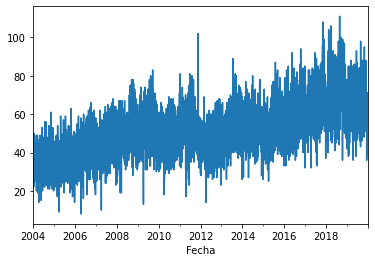

In [7]:
Delitos_dia = rawData["2004":"2019"].Delito.resample('D').count() #Extraer datos diarios, disminuir granularidad
Delitos_dia.plot()

In [42]:
Delitos_mes = rawData
print(Delitos_mes)

                      Delito      SubDelito  ...   Provincia         Canton
Fecha                                        ...                           
2004-01-01            ASALTO    ARMA BLANCA  ...       LIMON      SIQUIRRES
2008-02-15            ASALTO    ARMA BLANCA  ...    SAN JOSE  MONTES DE OCA
2004-01-03            ASALTO    ARMA BLANCA  ...    SAN JOSE     CURRIDABAT
2004-01-17            ASALTO    ARMA BLANCA  ...    ALAJUELA       PALMARES
2004-03-11            ASALTO    ARMA BLANCA  ...     CARTAGO      TURRIALBA
...                      ...            ...  ...         ...            ...
2020-02-02  ROBO DE VEHICULO  POR CONFIANZA  ...     HEREDIA        HEREDIA
2020-02-10  ROBO DE VEHICULO  POR CONFIANZA  ...    ALAJUELA     SAN CARLOS
2020-02-21  ROBO DE VEHICULO  POR CONFIANZA  ...  GUANACASTE         NICOYA
2020-02-24  ROBO DE VEHICULO  POR CONFIANZA  ...     HEREDIA         FLORES
2020-02-26  ROBO DE VEHICULO  POR CONFIANZA  ...  GUANACASTE       CARRILLO

[305818 row

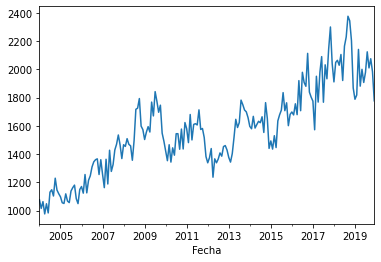

In [10]:
Delitos_mes = rawData["2004":"2019"].Delito.resample('M').count() #Extraer datos mensuales, disminuir granularidad
Delitos_mes.plot()

In [11]:
Delitos_mes

Fecha
2004-01-31    1076
2004-02-29    1015
2004-03-31    1063
2004-04-30     976
2004-05-31    1048
              ... 
2019-08-31    2124
2019-09-30    2010
2019-10-31    2075
2019-11-30    1983
2019-12-31    1777
Freq: M, Name: Delito, Length: 192, dtype: int64

Apertura de DataSet

In [12]:
Asaltos = rawData['Delito']=="ASALTO"
Asaltos = rawData[Asaltos]
Asaltos.to_csv(path_or_buf = "/content/drive/My Drive/Data/Asaltos.csv")
print(Asaltos)

            Delito    SubDelito  ...   Provincia         Canton
Fecha                            ...                           
2004-01-01  ASALTO  ARMA BLANCA  ...       LIMON      SIQUIRRES
2008-02-15  ASALTO  ARMA BLANCA  ...    SAN JOSE  MONTES DE OCA
2004-01-03  ASALTO  ARMA BLANCA  ...    SAN JOSE     CURRIDABAT
2004-01-17  ASALTO  ARMA BLANCA  ...    ALAJUELA       PALMARES
2004-03-11  ASALTO  ARMA BLANCA  ...     CARTAGO      TURRIALBA
...            ...          ...  ...         ...            ...
2015-02-27  ASALTO   USO DE GAS  ...  PUNTARENAS     PUNTARENAS
2015-04-24  ASALTO   USO DE GAS  ...  PUNTARENAS     PUNTARENAS
2016-10-09  ASALTO   USO DE GAS  ...    ALAJUELA      SAN RAMON
2017-08-12  ASALTO   USO DE GAS  ...    ALAJUELA      SAN MATEO
2019-06-21  ASALTO   USO DE GAS  ...     HEREDIA        HEREDIA

[217706 rows x 10 columns]


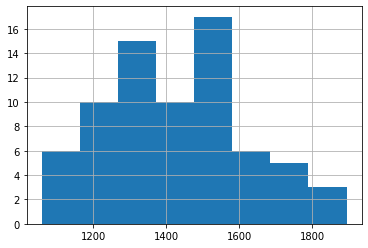

In [13]:
Asaltos["2014":"2019"].Delito.resample('M').count().hist(bins=8)

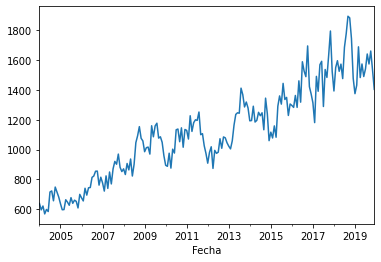

In [14]:
Asaltos = Asaltos["2004":"2019"].Delito.resample('M').count()
Asaltos.plot()

In [15]:
Homicidios = rawData['Delito']=="HOMICIDIO"
Homicidios = rawData[Homicidios]
Homicidios.to_csv(path_or_buf = "/content/drive/My Drive/Data/Homicidios.csv")
print(Homicidios)

               Delito                   SubDelito  ... Provincia      Canton
Fecha                                              ...                      
2015-02-28  HOMICIDIO  AJUSTE DE CUENTAS/VENGANZA  ...  SAN JOSE    SAN JOSE
2015-03-11  HOMICIDIO  AJUSTE DE CUENTAS/VENGANZA  ...     LIMON      POCOCI
2015-05-03  HOMICIDIO  AJUSTE DE CUENTAS/VENGANZA  ...  SAN JOSE       TIBAS
2015-02-18  HOMICIDIO  AJUSTE DE CUENTAS/VENGANZA  ...  SAN JOSE  ALAJUELITA
2015-01-08  HOMICIDIO  AJUSTE DE CUENTAS/VENGANZA  ...  SAN JOSE       TIBAS
...               ...                         ...  ...       ...         ...
2016-07-12  HOMICIDIO         VIOLENCIA DOMESTICA  ...   CARTAGO     CARTAGO
2017-03-02  HOMICIDIO         VIOLENCIA DOMESTICA  ...   CARTAGO    LA UNION
2018-12-12  HOMICIDIO         VIOLENCIA DOMESTICA  ...   CARTAGO   TURRIALBA
2019-02-05  HOMICIDIO         VIOLENCIA DOMESTICA  ...  SAN JOSE  GOICOECHEA
2019-07-01  HOMICIDIO         VIOLENCIA DOMESTICA  ...   CARTAGO     PARAISO

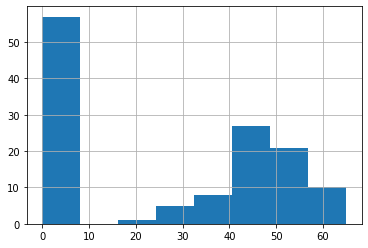

In [16]:
# Line Plot
%matplotlib inline
Homicidios["2004":"2019"].Delito.resample('M').count().hist(bins=8)

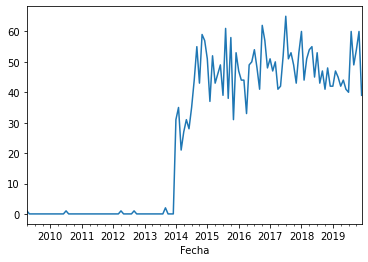

In [17]:
Homicidios = Homicidios["2004":"2019"].Delito.resample('M').count()
Homicidios.plot()

In [18]:
Robos_Carros = rawData['Delito']=="ROBO DE VEHICULO"
Robos_Carros = rawData[Robos_Carros]
Robos_Carros.to_csv(path_or_buf = "/content/drive/My Drive/Data/Robos_Carros.csv")
print(Robos_Carros)

                      Delito      SubDelito  ...   Provincia               Canton
Fecha                                        ...                                 
2004-06-19  ROBO DE VEHICULO   ARDID PREVIO  ...    SAN JOSE  VASQUEZ DE CORONADO
2004-10-07  ROBO DE VEHICULO   ARDID PREVIO  ...    SAN JOSE             SAN JOSE
2004-10-29  ROBO DE VEHICULO   ARDID PREVIO  ...    SAN JOSE              MORAVIA
2004-11-10  ROBO DE VEHICULO   ARDID PREVIO  ...    SAN JOSE             SAN JOSE
2005-02-24  ROBO DE VEHICULO   ARDID PREVIO  ...    SAN JOSE              MORAVIA
...                      ...            ...  ...         ...                  ...
2020-02-02  ROBO DE VEHICULO  POR CONFIANZA  ...     HEREDIA              HEREDIA
2020-02-10  ROBO DE VEHICULO  POR CONFIANZA  ...    ALAJUELA           SAN CARLOS
2020-02-21  ROBO DE VEHICULO  POR CONFIANZA  ...  GUANACASTE               NICOYA
2020-02-24  ROBO DE VEHICULO  POR CONFIANZA  ...     HEREDIA               FLORES
2020-02-26  ROBO

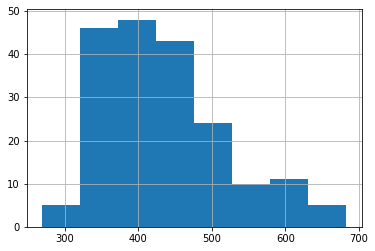

In [19]:
Robos_Carros["2004":"2019"].Delito.resample('M').count().hist(bins=8)

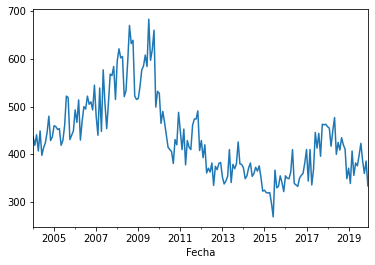

In [20]:
Robos_Carros = Robos_Carros["2004":"2019"].Delito.resample('M').count()
Robos_Carros.plot()

## EDA

Profet FCST

In [21]:
pip install pystan

In [22]:
pip install fbprophet

In [0]:
# Python
from fbprophet import Prophet

In [24]:
FCSTHomicidios = pd.DataFrame(columns = ['ds', 'y'])
FCSTHomicidios

Empty DataFrame
Columns: [ds, y]
Index: []

In [0]:
FCSTHomicidios['y'] = Delitos_dia

In [0]:
FCSTHomicidios['ds'] = Delitos_dia.index

In [27]:
FCSTHomicidios

ds   y
Fecha                    
2004-01-01 2004-01-01  25
2004-01-02 2004-01-02  23
2004-01-03 2004-01-03  32
2004-01-04 2004-01-04  26
2004-01-05 2004-01-05  45
...               ...  ..
2019-12-27 2019-12-27  51
2019-12-28 2019-12-28  54
2019-12-29 2019-12-29  58
2019-12-30 2019-12-30  58
2019-12-31 2019-12-31  71

[5844 rows x 2 columns]

In [28]:
FCSTHomicidios.reset_index(drop=True, inplace=True)
FCSTHomicidios['y'] = FCSTHomicidios['y'].astype('int')
FCSTHomicidios

ds   y
0    2004-01-01  25
1    2004-01-02  23
2    2004-01-03  32
3    2004-01-04  26
4    2004-01-05  45
...         ...  ..
5839 2019-12-27  51
5840 2019-12-28  54
5841 2019-12-29  58
5842 2019-12-30  58
5843 2019-12-31  71

[5844 rows x 2 columns]

In [29]:
FCSTHomicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5844 entries, 0 to 5843
Data columns (total 2 columns):
ds    5844 non-null datetime64[ns]
y     5844 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 91.4 KB


In [30]:
#FCSTHomicidios.rename(columns={"DS": "ds", "Y": "y"})
FCSTHomicidios

ds   y
0    2004-01-01  25
1    2004-01-02  23
2    2004-01-03  32
3    2004-01-04  26
4    2004-01-05  45
...         ...  ..
5839 2019-12-27  51
5840 2019-12-28  54
5841 2019-12-29  58
5842 2019-12-30  58
5843 2019-12-31  71

[5844 rows x 2 columns]

Fit the Prophet

In [31]:
m = Prophet(daily_seasonality=True)
m.fit(FCSTHomicidios)

Predictions

In [32]:
futureHomicidios = m.make_future_dataframe(periods=365)
futureHomicidios.tail()

ds
6204 2020-12-26
6205 2020-12-27
6206 2020-12-28
6207 2020-12-29
6208 2020-12-30

In [47]:
forecast = m.predict(futureHomicidios)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(100)

ds       yhat  yhat_lower  yhat_upper
6109 2020-09-22  72.147983   59.737551   83.740344
6110 2020-09-23  72.699210   61.212523   83.752101
6111 2020-09-24  71.958052   59.435961   84.267226
6112 2020-09-25  76.835974   64.912143   88.016811
6113 2020-09-26  75.711799   63.569095   87.610674
...         ...        ...         ...         ...
6204 2020-12-26  68.963608   56.809985   80.119959
6205 2020-12-27  58.742562   46.171036   69.854869
6206 2020-12-28  65.933511   54.195470   77.084065
6207 2020-12-29  65.287262   54.314807   77.187723
6208 2020-12-30  66.007106   55.218053   77.738430

[100 rows x 4 columns]

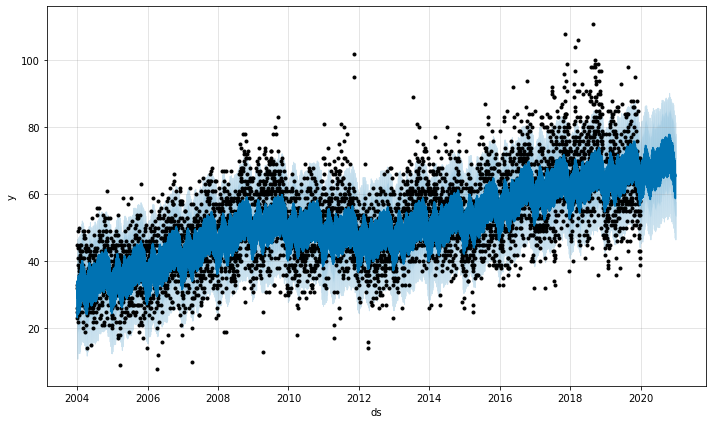

In [34]:
fig1 = m.plot(forecast)

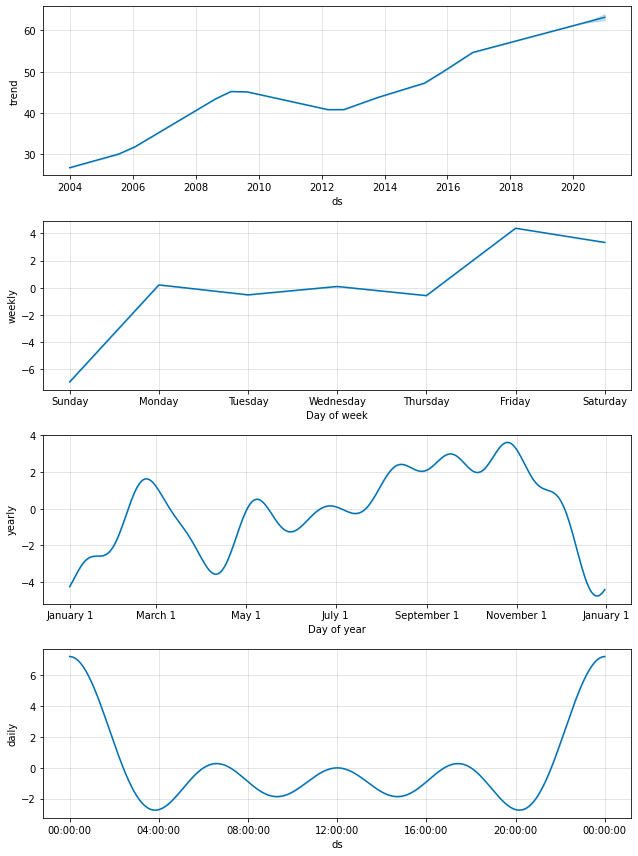

In [35]:
fig2 = m.plot_components(forecast)

In [0]:
#pip install plotly==4.5.4

In [37]:
from fbprophet.plot import plot_plotly
py.init_notebook_mode()

In [38]:
fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)

In [0]:
#help(Prophet)

In [40]:
futureHomicidios

ds
0    2004-01-01
1    2004-01-02
2    2004-01-03
3    2004-01-04
4    2004-01-05
...         ...
6204 2020-12-26
6205 2020-12-27
6206 2020-12-28
6207 2020-12-29
6208 2020-12-30

[6209 rows x 1 columns]

In [41]:
forecast

ds      trend  ...  multiplicative_terms_upper       yhat
0    2004-01-01  26.758321  ...                         0.0  29.070758
1    2004-01-02  26.764093  ...                         0.0  34.165990
2    2004-01-03  26.769865  ...                         0.0  33.272286
3    2004-01-04  26.775637  ...                         0.0  23.174004
4    2004-01-05  26.781409  ...                         0.0  30.463965
...         ...        ...  ...                         ...        ...
6204 2020-12-26  63.151575  ...                         0.0  68.963608
6205 2020-12-27  63.157134  ...                         0.0  58.742562
6206 2020-12-28  63.162692  ...                         0.0  65.933511
6207 2020-12-29  63.168251  ...                         0.0  65.287262
6208 2020-12-30  63.173810  ...                         0.0  66.007106

[6209 rows x 22 columns]